---

# How to use your own `matplotlib` `Figure` and `Axes` in `mplfinance`

---

### &bull; Using your own `matplotlib` `Figure` and `Axes` makes your code more complex,<br>&nbsp;&nbsp; compared to direct use of `mplfinance`,<br>&nbsp;&nbsp; but it provides all the power and flexibility of `matplotlib`<br>&nbsp;&nbsp; for those who know how and want to use it.
- When you pass a `matplotbib` `Axes` into `mplfinance`,<br>&nbsp;&nbsp; we say that `mplfinance` is in **External Axes Mode.**  
- Certain `mplfinance` features may be not available,<br>&nbsp;&nbsp; or may behave differently, when in External Axes Mode (see below for details).

---

In [2]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
%matplotlib inline
import pandas as pd

In [4]:
idf = pd.read_csv('data/SPY_20110701_20120630_Bollinger.csv',index_col=0,parse_dates=True)
idf.shape
idf.head(3)
idf.tail(3)

(252, 9)

,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2011-07-01,132.089996,134.100006,131.779999,133.919998,117.161659,202385700,132.373927,125.316073,1.219057
2011-07-05,133.779999,134.080002,133.389999,133.809998,117.065437,165936000,133.254297,124.912703,1.066618
2011-07-06,133.490005,134.139999,133.110001,133.970001,117.205429,143331600,134.040915,124.627085,0.992467


,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2012-06-27,132.419998,133.429993,131.970001,133.169998,118.980804,108088000,136.447962,128.140042,0.605441
2012-06-28,132.289993,132.990005,131.279999,132.789993,118.641281,169242100,136.500761,128.219241,0.551922
2012-06-29,135.199997,136.270004,134.850006,136.100006,121.598610,212250900,136.721010,128.792993,0.921670


#### Let's grab 5 months of data from the input data frame:

In [5]:
df = idf.loc['2011-07-01':'2011-12-30',:]

#### We can, of course, plot a basic ohlc or candlestick plot:

'0.12.10b0'

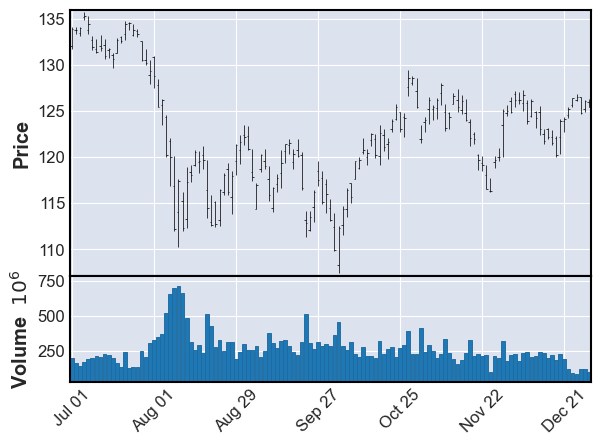

In [6]:
import mplfinance as mpf
mpf.__version__
mpf.plot(df,volume=True,tight_layout=True,figscale=0.75)

---

## Basic Introduction to External Axes Mode:

---

**`mplfinance`** provides a wrapper function to create a **`Figure`:**
 
- [**`mpf.figure()`**](https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib-pyplot-figure)
  
This function behaves exactly like its matplotlib `pyplot` equivalent, with the added feature that it accepts **`style=`** kwarg, and embeds `mplfinance` style information into the Figure that it creates.

---

**Once you have created a Figure, you can call standard matplotlib Figure methods for creating subplot Axes:**

- [**`fig.add_subplot()`**](https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_subplot)
- [**`fig.add_axes()`**](https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_axes)
- [**`fig.subplots()`**](https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.subplots)

Regarding the above three Figure methods, if the Figure was created using `mplfinance`, then these methods will apply style information to the Subplot Axes they create, based on the mplfinance style information found inside the Figure. ***Alternatively*** the user may pass **`style=`** into these Figure methods to apply a style to the Subplot Axes that may be different from the style that was applied to the Figure.

---
---
#### EXAMPLE 1

Create a figure, and two subplot Axes: one for the OHLC data, and one for Volume.

**NOTE** that the style information need only be applied when creating the Figure.  The same style information then propagates throughout subplot Axes creation and into `mpf.plot()`, unless overridden with kwarg `style=` in these latter methods.


In [7]:
%%capture
fig = mpf.figure(style='yahoo',figsize=(7,8))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

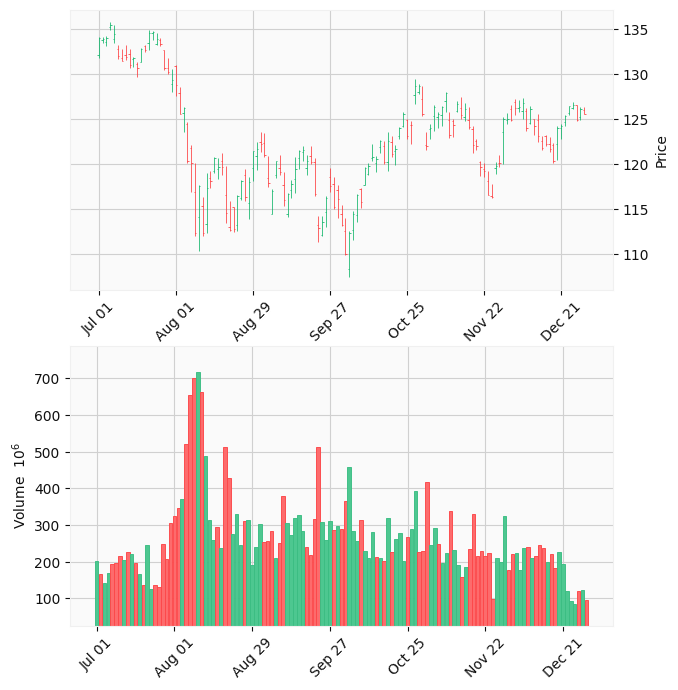

In [8]:
mpf.plot(df,ax=ax1,volume=ax2)
fig

---

**Notice** above that we display the plot by simply saying,

**`fig`**

This is because the code is executed in a jupyter notebook **cell**.  

In a normal python script you would call **`mpf.show()`** or `plt.show()`.

---
---
#### EXAMPLE 2

Create a figure, (with `default` style) and create four subplot Axes each with a different style.

In [9]:
fig = mpf.figure(figsize=(12,9))

<Mpf_Figure size 1200x900 with 0 Axes>

In [10]:
ax1 = fig.add_subplot(2,2,1,style='blueskies')
ax2 = fig.add_subplot(2,2,2,style='yahoo')

s   = mpf.make_mpf_style(base_mpl_style='fast',base_mpf_style='nightclouds')
ax3 = fig.add_subplot(2,2,3,style=s)

ax4 = fig.add_subplot(2,2,4,style='starsandstripes')

In [11]:
mpf.plot(df,ax=ax1,axtitle='blueskies',xrotation=15)
mpf.plot(df,type='candle',ax=ax2,axtitle='yahoo',xrotation=15)
mpf.plot(df,ax=ax3,type='candle',axtitle='nightclouds')
mpf.plot(df,type='candle',ax=ax4,axtitle='starsandstripes')

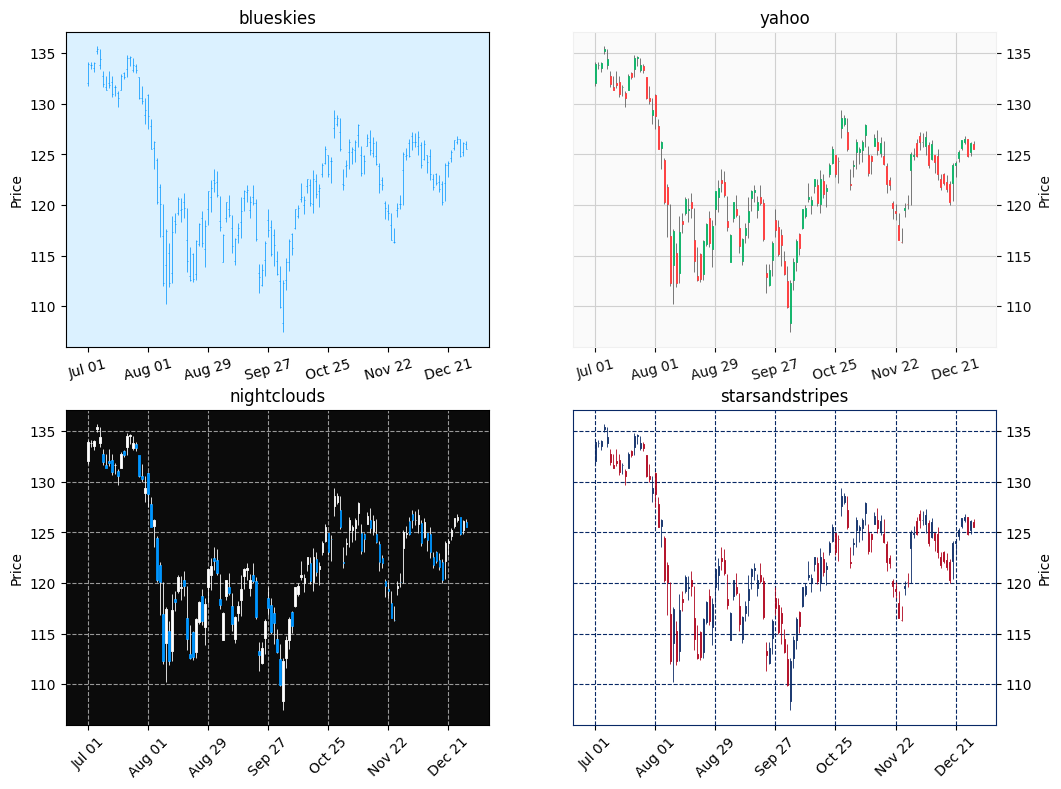

In [12]:
fig

---
---
#### EXAMPLE 3

Three candle plots side-by-side

In [13]:
aapl = pd.read_csv('data/yahoofinance-AAPL-20040819-20180120.csv',index_col='Date',parse_dates=True)
goog = pd.read_csv('data/yahoofinance-GOOG-20040819-20180120.csv',index_col='Date',parse_dates=True)
spy  = pd.read_csv('data/yahoofinance-SPY-20080101-20180101.csv',index_col='Date',parse_dates=True)
aapl = aapl.loc['2016-05-01':'2016-07-31']
goog = goog.loc['2016-05-01':'2016-07-31']
spy  = spy.loc['2016-05-01':'2016-07-31']

In [14]:
fig = mpf.figure(figsize=(9,6),style='yahoo')

<Mpf_Figure size 900x600 with 0 Axes>

In [15]:
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)

av1 = fig.add_subplot(3,3,7,sharex=ax1)
av2 = fig.add_subplot(3,3,8,sharex=ax1)
av3 = fig.add_subplot(3,3,9,sharex=ax3)

In [16]:
mpf.plot(aapl,type='candle',ax=ax1,volume=av1,mav=(10,20),axtitle='AAPL')
mpf.plot(goog,type='candle',ax=ax2,volume=av2,mav=(10,20),axtitle='GOOG')
mpf.plot(spy ,type='candle',ax=ax3,volume=av3,mav=(10,20),axtitle='SPY')

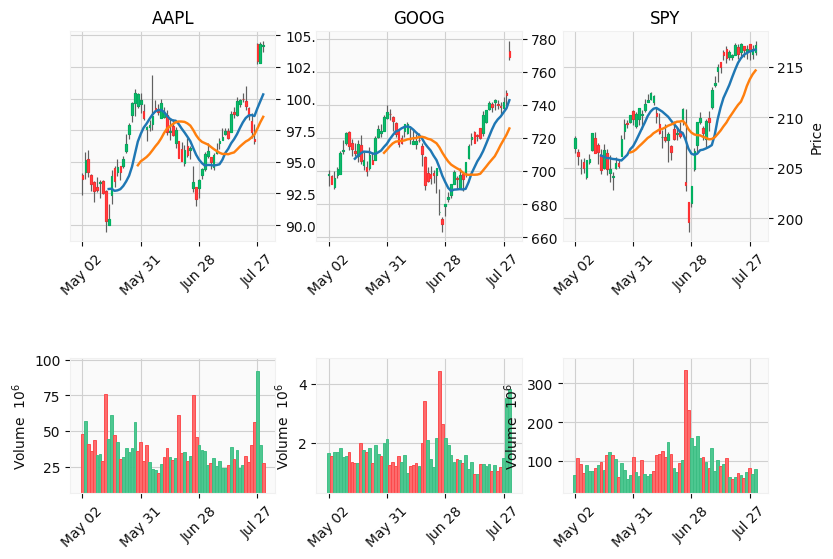

In [17]:
fig

---
---
#### EXAMPLE 4

OHLC Bars, and Candle, on same plot:
- First using addplot
- Second using External Axes, **which allows us to use a different style for the OHLC bars versus Candles**

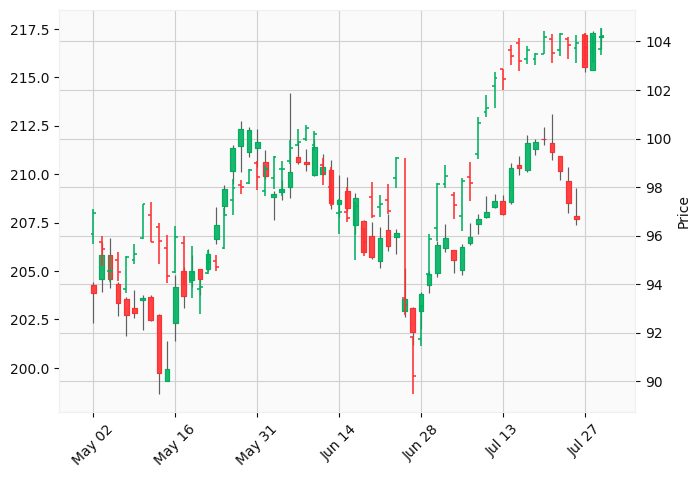

In [18]:
ap = mpf.make_addplot(spy,type='ohlc')
mpf.plot(aapl,type='candle',style='yahoo',addplot=ap)

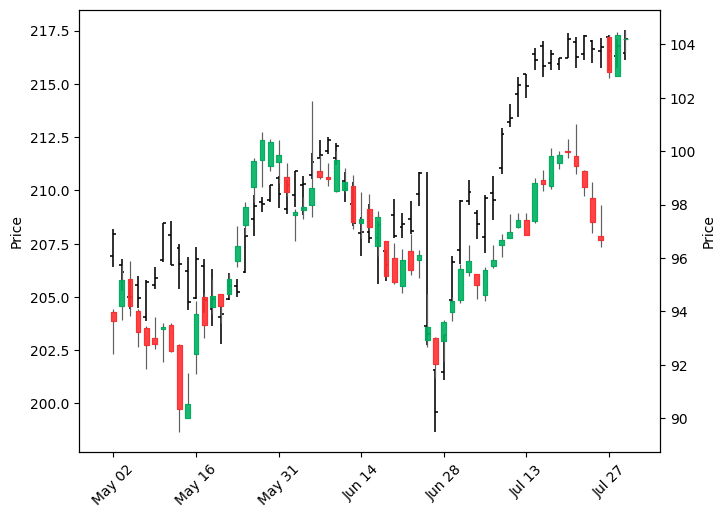

In [21]:
s = mpf.make_mpf_style(rc={'axes.grid':False})
fig = mpf.figure(style=s,figsize=(7.5,5.75))
ax1 = fig.subplot()
ax2 = ax1.twinx()
mpf.plot(spy ,ax=ax1,type='ohlc',style='default')
mpf.plot(aapl,ax=ax2,type='candle',style='yahoo')

---

### Example 5 - passing external axes into addplot

---

In [22]:
%%capture
fig = mpf.figure(style='blueskies',figsize=(7,8))
ax1 = fig.add_subplot(2,1,1)
ax2 = ax1.twinx()
ax4 = fig.add_subplot(2,1,2)

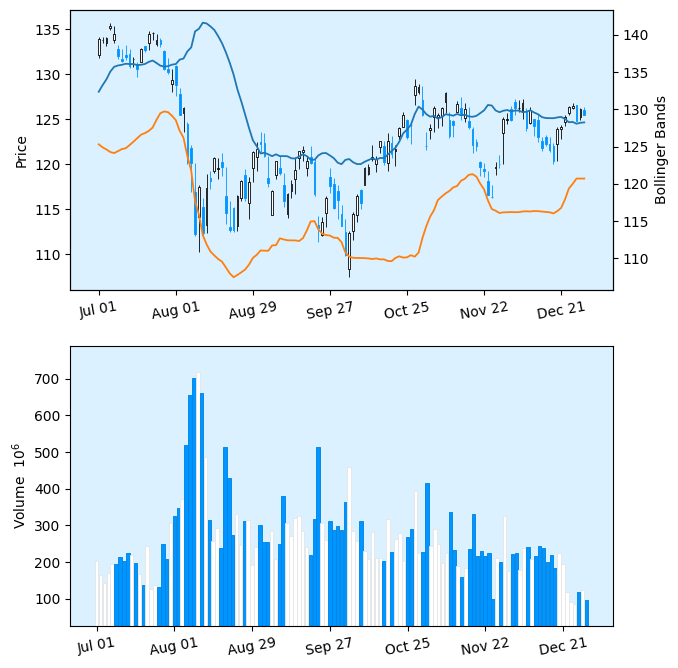

In [23]:
ap = mpf.make_addplot(df[['UpperB','LowerB']],ax=ax2,ylabel='Bollinger Bands')
mpf.plot(df,ax=ax1,volume=ax4,addplot=ap,xrotation=10,type='candle')
fig

In [24]:
%%capture
fig = mpf.figure(style='charles',figsize=(7,8))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2,sharex=ax1)
ax3 = fig.add_subplot(3,1,3)

In [25]:
ap = [ mpf.make_addplot(df,type='ohlc',ax=ax2,ylabel='OHLC Price'),
       mpf.make_addplot(df[['UpperB','LowerB']],ax=ax1)
     ]
mpf.plot(df,ax=ax1,volume=ax3,addplot=ap,xrotation=10,type='candle')

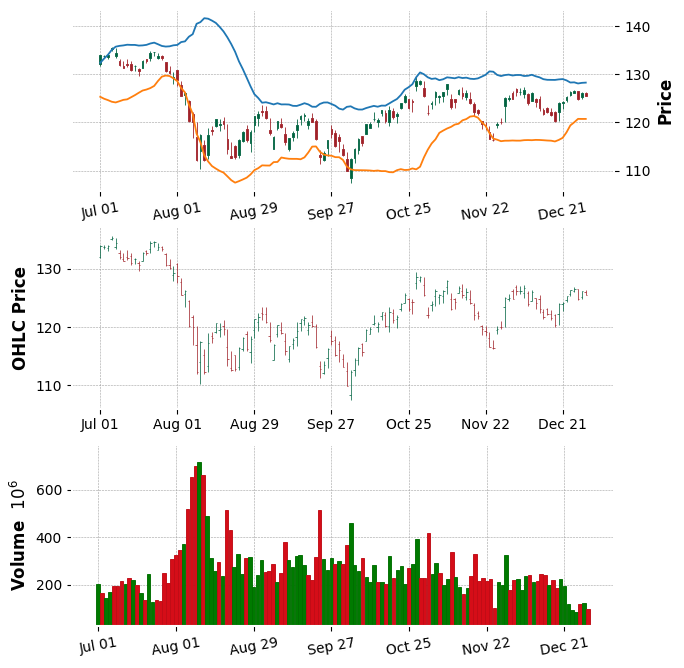

In [26]:
fig